# Classification Problem

**Author:** Manaranjan Pradhan</br>
**Email ID:** manaranjan@gmail.com</br>
**LinkedIn:** https://www.linkedin.com/in/manaranjanpradhan/</br>
**Website:** www.manaranjanp.com


## 1. HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

## 2. Data Set

This dataset is taken from kaggle https://www.kaggle.com/datasets/jacksonchou/hr-data-for-analytics


### 2.1 Dependent variable

Left : 0 if employee did not leave , 1 if left company

### 2.2 Independent variables

- **satisfaction_level** : means how much employee satisfied (0 less satisfied , 1 most satisfied)
- **last_evaluation** : means employees' evaluation for last month (0 bad , 1 Excellent)
- **number_project** : number of projects the employee worked on
- **average_montly_hours** : average months employee spends at work per month
- **time_spend_company** : years the employee spent in a company
- **Work_accident** : 0 if he did not have an accident , 1 if had at least one
- **promotion_last_5years** : 0 if he did not have any promotion in last 5 years , 1 if had at least one
- **dept** : department in which employee works
- **salary** : High, medium or low bracket

## 3. Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_palette("tab10")

In [2]:
hr_df = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
1380,0.87,0.92,4,253,6,0,1,0,marketing,low
3608,0.89,0.66,5,224,2,0,0,0,sales,medium
3008,0.60,0.61,4,209,3,0,0,0,accounting,low
3505,0.50,0.56,4,266,2,0,0,0,RandD,low
771,0.10,0.86,6,309,4,0,1,0,sales,medium
13675,0.49,0.66,3,155,3,0,0,1,sales,low
706,0.79,0.93,4,226,5,0,1,0,sales,low
4799,0.37,0.74,2,197,3,0,0,0,product_mng,low
11802,0.90,0.73,4,245,2,0,0,0,sales,low
4258,0.78,0.80,4,197,3,1,0,0,technical,low


In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 4. EDA

**Question 1**: How satisfcation level influences employee's decision to leave?

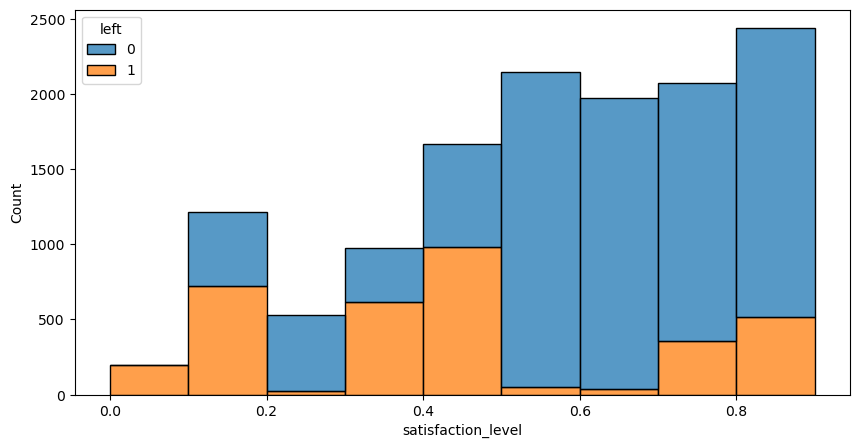

In [5]:
plt.figure(figsize=(10, 5))
sn.histplot(data = hr_df, 
            x = 'satisfaction_level', 
            hue = 'left', 
            bins = np.arange(0.0, 1.0, 0.1),
            multiple="stack");

**Question 2**: How time spend in the company influences employee's decision to leave?

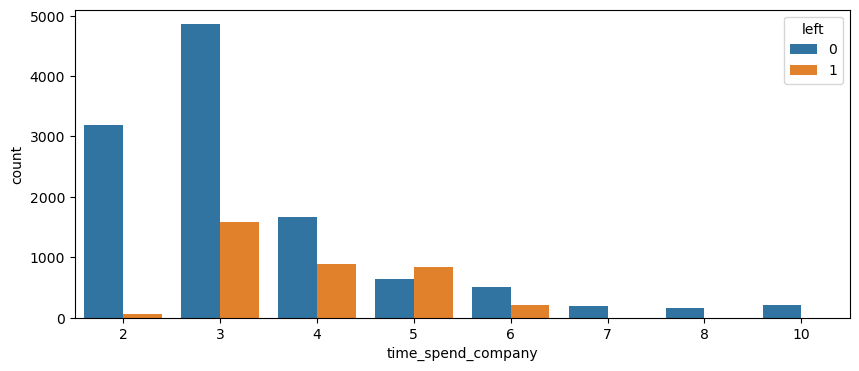

In [6]:
plt.figure(figsize=(10, 4))
sn.countplot(data = hr_df,
             x = 'time_spend_company',
             hue = 'left');

**Question 3**: Attrition patterns across different departments.

In [7]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
pd.crosstab(hr_df.dept, 
            hr_df.left, 
            normalize='index')

left,0,1
dept,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


### Ex1: Participant Exercise 

**Question:** How last evaluation influences employee's decision to leave?

## 5. Building a Classification Model

First we will build a model with *satisfaction level* with *left*.

### 5.1 Setting X and y Values

In [9]:
X = hr_df[['satisfaction_level']]
y = hr_df.left

In [10]:
X[0:2]

,satisfaction_level
0,0.38
1,0.80


In [11]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

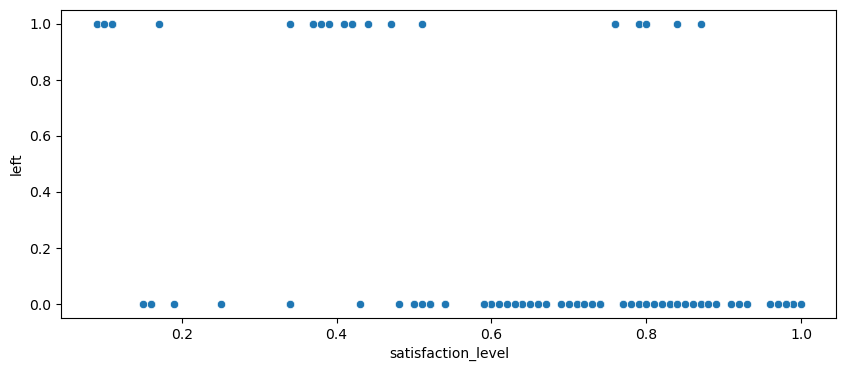

In [12]:
plt.figure(figsize=(10, 4))
sn.scatterplot(data = hr_df.sample(100, random_state = 78),
               x = 'satisfaction_level',
               y = 'left');

### 5.2 Logistic Function

Logistic Regression Model - Sigmoid function

<img src="Logistic.png" alt="ML Algorithms" width="500"/>

The probability of y is given by the equation:

$$p(y) = \frac{1}{1+e^{-(\beta_0 + \beta_1x)}}$$


Then predict the class of y based on threshold value.


$$
\hat y
= 
\begin{cases}
0 \text{ if } \hat p < 0.5\\
1 \text{ if } \hat p \geqslant 0.5
\end{cases}
$$

### 5.3 Split Dataset into train and test

- Train: 80%
- Test: 20%

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [15]:
X_train.shape

(11999, 1)

In [16]:
X_test.shape

(3000, 1)

### 5.4 Build Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg_v1 = LogisticRegression(random_state=100)

In [19]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(random_state=100)

### 5.5 Finding Parameters

In [20]:
logreg_v1.intercept_

array([0.8983167])

In [21]:
logreg_v1.coef_

array([[-3.71491759]])

**Note:** What is the meaning of negative coefficient here?

### 5.6 Probability of leaving at different Satisfaction Scores

- Create a list satisfaction scores from 0.0 to 1.0

In [22]:
sl_list = np.arange(0.0, 1.0, 0.05)

In [23]:
sl_list

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [24]:
beta_0 = logreg_v1.intercept_[0]
beta_1 = logreg_v1.coef_[0][0]

In [25]:
beta_0, beta_1

(0.8983167019554221, -3.714917585894512)

- Calculate the probability values based on the logistic function

In [26]:
sl_probs = [(1.0 / (1.0 + np.exp(-(beta_0+beta_1*x)))) for x in sl_list]

In [27]:
sl_probs_df = pd.DataFrame({'SL': sl_list, 'Prob_Left': sl_probs })

In [28]:
sl_probs_df

,SL,Prob_Left
0,0.00,0.710603
1,0.05,0.670969
2,0.10,0.628742
3,0.15,0.584453
4,0.20,0.538755
5,0.25,0.492397
6,0.30,0.446170
7,0.35,0.400855
8,0.40,0.357174
9,0.45,0.315745


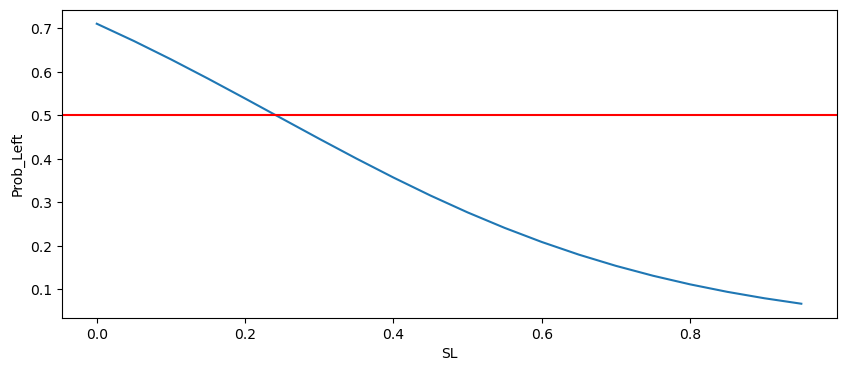

In [29]:
plt.figure(figsize=(10, 4))
sn.lineplot(data=sl_probs_df, x="SL", y="Prob_Left");
plt.axhline(y=0.5, color = 'r');

### 5.7 Predicting on Test Data

In [30]:
y_pred = logreg_v1.predict(X_test)

In [31]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred})

In [32]:
y_df.sample(10, random_state=20)

,actual,predicted
310,1,1
14670,1,0
1322,1,0
3314,0,0
11348,0,1
12630,1,1
7293,0,0
13600,0,1
4038,0,0
1499,1,0


### 5.8 Measuring Accuracy

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.7683333333333333

###  Ex2: Participant Exercise:

- Build a logistic regression model between average_montly_hours and left
- Predict probability for different values of average_montly_hours from 50 hours to 400 hours with 10 hours of step
- Plot the logistic function

# Evaluating Classification Models

- How many correctly classified from the class of left i.e y = 1.
- How many correctly classified from the class of not left i.e y = 0.

**Four Scenarios**:

| Actual | Predicted | Implications |
|---------|----------|--------------|
| Left | Left | **Correct Classification** |
| Left | Not Left |  **Misclassification**: This failure has higher cost. As the model is not able to identify some employees who are likely to leave.   |
| Not Left | Left | **Misclassification**: This failure may not as high cost as the previos one.   |
| Not Left | Not Left | **Correct Classification** |


## 6. Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
cm = confusion_matrix(y_df.actual, y_df.predicted, labels=[1,0])

In [38]:
cm

array([[ 209,  541],
       [ 154, 2096]])

In [39]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['Left', 'Not Left'])

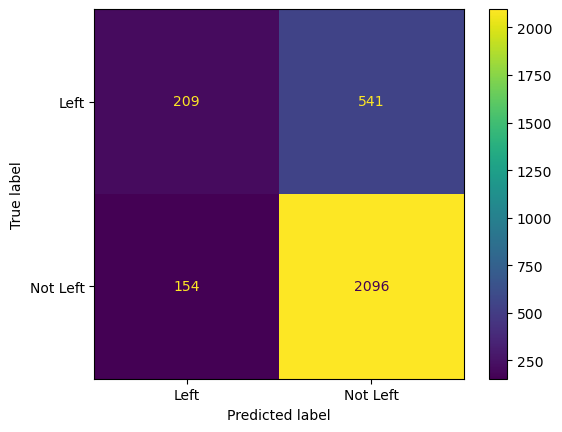

In [40]:
cm_plot.plot();

### 6.1. What is a confusion matrix?

The confusion matrix is an important tool for evaluating classification models because it provides a detailed breakdown of the model's performance by showing the number of correct and incorrect predictions made for each class.

<img title="a title" alt="Confusion Matrix" src="cm.png" width='500' height = '500'>

### 6.2. Which failures are costly: False Positives or False Negatives?

#### Identify which failures are costly in each of the below scenarios.

- Building a classification model for loan approval? If the loan applicant will default a loan or not default a loan.
- Building a classification model for detecting spam mails? If the mail is a spam mail or not.

### 6.3. What are different accuracy measures?

**Total Accuracy** is defined as how many are correct classification across the complete test sample.

$Total Accuracy = ({\frac {TP + TN}{TP+FP+FN+TN}})$

**Precision** is defined as how many are actual positives out of total number of positives identified by the model and is defined as 

$TPR = ({\frac {TP}{TP+FP}})$

**True Positive Rate (TPR) or Recall or Sensitivity** is how many actual positive are properly identified by the model out of total number actual positive in the test set and is defined as 

$TPR = ({\frac {TP}{TP+FN}})$

**True Negative Rate (TNR) or Specificity** is how many are correctly indentified as correct negatives out of all acutal negative present in the test set and is defined as 

$TNR = ({\frac {TN}{FP+TN}})$

**F-Score (F-Measure)** is another measure used in binary logistic regression that combines both precision and recall (harmonic mean of precision and recall) and is given by 

${F1−score}$ = $({\frac {2 x Precision x Recall}{ Precision + Recall }})$

*classification_report* method in *skearn.metrics* give a detailed report of precision, recall and f1-score for each classes.

**Note**: Confusion matrix can be created only after cut-off probability is known. In the example above, the cut-off probability is assumed to be 0.5.

The actual value of y is based on threshold value of 0.5


$$
\hat y
= 
\begin{cases}
0 \text{ if } \hat p < 0.5\\
1 \text{ if } \hat p \geqslant 0.5
\end{cases}
$$

### 6.4 Finding accuracy metrices

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [42]:
recall_score(y_df.actual, y_df.predicted)

0.2786666666666667

In [43]:
precision_score(y_df.actual, y_df.predicted)

0.5757575757575758

In [44]:
f1_score(y_df.actual, y_df.predicted)

0.3755615453728661

In [45]:
print(classification_report(y_df.actual, y_df.predicted))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2250
           1       0.58      0.28      0.38       750

    accuracy                           0.77      3000
   macro avg       0.69      0.61      0.62      3000
weighted avg       0.74      0.77      0.74      3000



###  Ex3: Participant Exercise:

- Build a logistic regression model with all the variables and left
- Compute RoC AUC and draw the curve
- Compute confusion and draw the confusion matrix